In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv('bank_note_data.csv')

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Standardization

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [16]:
features = list(df.columns[:-1])
target = (df.columns[-1])

In [7]:
data = df.copy()

In [8]:
data[features] = sc.fit_transform(df[features])

In [9]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


# TSNE

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=500)

In [11]:
x_tsne = tsne.fit_transform(data[features])

In [12]:
x_tsne

array([[-28.819801, -25.779907],
       [-26.82279 , -29.37888 ],
       [ 37.071777, -29.899214],
       ...,
       [ 60.413616,  16.214188],
       [ 52.00146 ,  14.781543],
       [ 18.672264,  34.96175 ]], dtype=float32)

## Visualization

In [18]:
y = data[target]

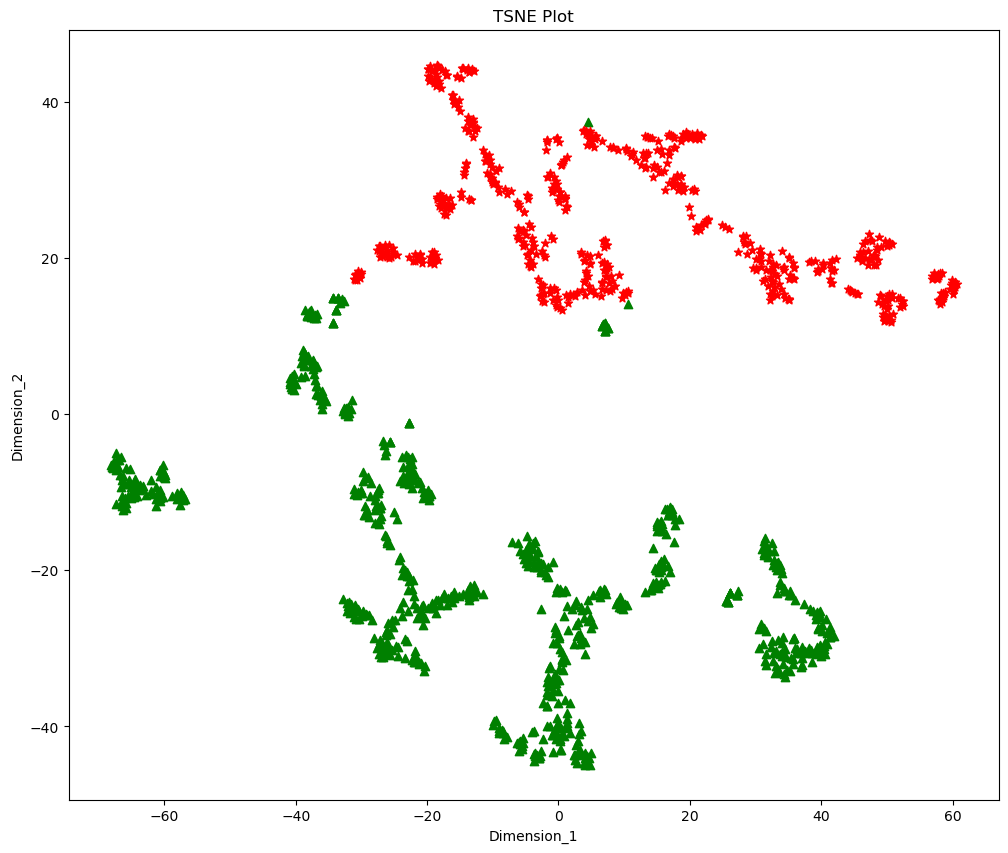

In [20]:
plt.figure(figsize = (12,10))
plt.scatter(x_tsne[np.where(y == 0), 0], x_tsne[np.where(y==0), 1], c = 'green', marker = '^')
plt.scatter(x_tsne[np.where(y == 1), 0], x_tsne[np.where(y==1), 1], c = 'red', marker = '*')
plt.xlabel("Dimension_1")
plt.ylabel("Dimension_2")
plt.title("TSNE Plot")
plt.show()